In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
read_dir = r'C:\Users\ed_22\Documents\Selected-Statistics-Topics\Partial-II\Practice'
file_name = 'AirPassengers.csv'
read_path = os.path.join(read_dir, file_name)

In [3]:
data = pd.read_csv(read_path,
                   header=0,
                   names=['month', 'n_passengers'],
                  date_parser='month').set_index('month')
data.head()

,n_passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


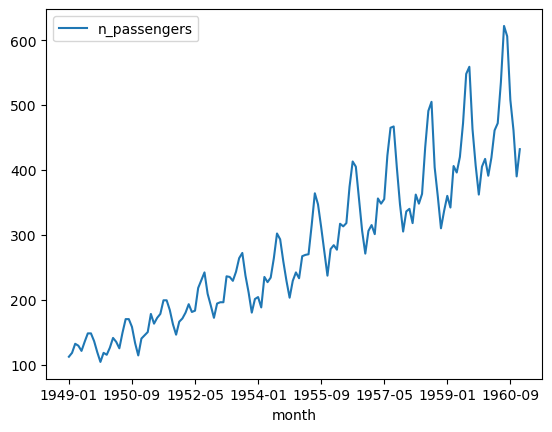

In [4]:
data.plot()
plt.show()

# Aplicando test Dickey-Fuller test

In [5]:
test = adfuller(data)
test

(0.8153688792060502,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

El p-valor es de:

In [6]:
test[1]

0.991880243437641

¿Aceptamos la hipótesis nula?

Es decir, ¿p-valor $\leq$ 0.05?

In [8]:
test[1] <= 0.05

False

In [9]:
data.head()

,n_passengers
month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [10]:
data_log = data.copy()
data_log['n_passengers'] = np.log(data.n_passengers)

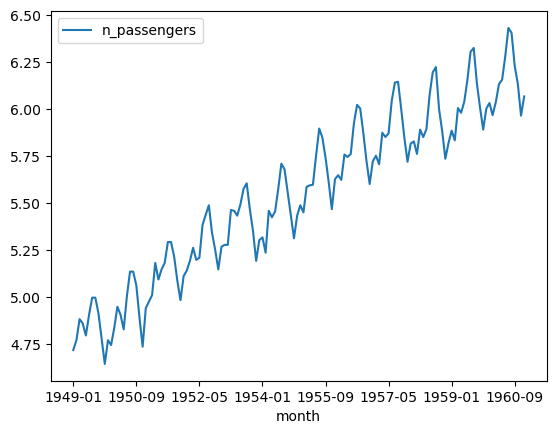

In [11]:
data_log.plot()
plt.show()

In [18]:
data_diff = data_log.copy()
data_diff['n_passengers'] = data_diff.n_passengers.shift(12).diff()

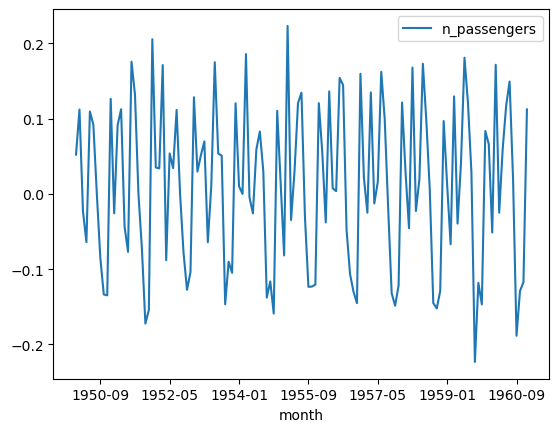

In [19]:
data_diff.plot()
plt.show()

## Aplicando test nuevamente

In [20]:
test2 = adfuller(data_diff)
test2[1] <= 0.05

MissingDataError: exog contains inf or nans

In [21]:
data_diff.head(15)

,n_passengers
month,
1949-01,NaN
1949-02,NaN
1949-03,NaN
1949-04,NaN
1949-05,NaN
1949-06,NaN
1949-07,NaN
1949-08,NaN
1949-09,NaN


In [22]:
data_stationary = data_diff.dropna()
test2 = adfuller(data_stationary)
test2[1] <= 0.05

True